In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#train_df = pd.read_csv("Apr-05-2021.csv", index_col=0)
train_df = pd.read_csv("mvfst-server.csv")
train_df.head()

,Run,Implementation,Mode,TestName,Status,ErrorIEV,OutputFile,NbPktSend,isPass
0,0,mvfst,server,quic_server_test_version_negociation0,NaN,NaN,/home/user/Documents/QUIC-FormalVerification/r...,0.0,1.0
1,1,mvfst,server,quic_server_test_version_negociation0,NaN,NaN,/home/user/Documents/QUIC-FormalVerification/r...,0.0,1.0
2,2,mvfst,server,quic_server_test_retry0,NaN,NaN,/home/user/Documents/QUIC-FormalVerification/r...,0.0,1.0
3,3,mvfst,server,quic_server_test_retry0,NaN,NaN,/home/user/Documents/QUIC-FormalVerification/r...,0.0,1.0
4,4,mvfst,server,quic_server_test_retry0,NaN,require conn_total_data(the_cid) > 0+,/home/user/Documents/QUIC-FormalVerification/r...,0.0,0.0


In [ ]:
#       ['quic_server_test_stream', 'quic_server_test_unkown',
#       'quic_server_test_tp_limit_newcoid', 'quic_server_test_max',
#       'quic_server_test_token_error', 'quic_server_test_tp_error',
#       'quic_server_test_tp_acticoid_error',
#       'quic_server_test_connection_close',
#       'quic_server_test_reset_stream',
#       'quic_server_test_handshake_done_error',
#       'quic_server_test_stop_sending',
#       'quic_server_test_double_tp_error',
#       'quic_server_test_tp_limit_acticoid_error',
#       'quic_server_test_no_icid', 'quic_server_test_ext_min_ack_delay']

train_df = train_df[train_df.TestName != 'quic_server_test_stream']
train_df = train_df[train_df.TestName != 'quic_server_test_unkown']
train_df = train_df[train_df.TestName != 'quic_server_test_tp_limit_newcoid']
train_df = train_df[train_df.TestName != 'quic_server_test_max']
train_df = train_df[train_df.TestName != 'quic_server_test_token_error']
train_df = train_df[train_df.TestName != 'quic_server_test_tp_error']
train_df = train_df[train_df.TestName != 'quic_server_test_tp_acticoid_error']
train_df = train_df[train_df.TestName != 'quic_server_test_reset_stream']
train_df = train_df[train_df.TestName != 'quic_server_test_handshake_done_error']
train_df = train_df[train_df.TestName != 'quic_server_test_stop_sending']
train_df = train_df[train_df.TestName != 'quic_server_test_double_tp_error']
train_df = train_df[train_df.TestName != 'quic_server_test_tp_limit_acticoid_error']
train_df = train_df[train_df.TestName != 'quic_server_test_ext_min_ack_delay']
train_df.head()

In [4]:
server_name = train_df.Implementation.unique()
servers = []
for s in server_name:
    if "cargo run" in s:
        servers.append("quinn")
        train_df["Implementation"] = train_df["Implementation"].replace(s, "quinn")
    if "./http_server" in s:
        servers.append("lsquic")
        train_df["Implementation"] = train_df["Implementation"].replace(s, "lsquic")
    if "./picoquicdemo" in s:
        servers.append("picoquic")
        train_df["Implementation"] = train_df["Implementation"].replace(s, "picoquic")
    if "./server -d" in s:
        servers.append("quant")
        train_df["Implementation"] = train_df["Implementation"].replace(s, "quant")
    if "./server -c" in s:
        servers.append("quic-go")
        train_df["Implementation"] = train_df["Implementation"].replace(s, "quic-go")
    if "python3" in s:
        servers.append("aioquic")
        train_df["Implementation"] = train_df["Implementation"].replace(s, "aioquic")
    if "echo" in s:
        servers.append("mvfst")
        train_df["Implementation"] = train_df["Implementation"].replace(s, "mvfst")

print(servers)
train_df["isPass"] = train_df["isPass"].replace(0.0, 0)
train_df["isPass"] = train_df["isPass"].replace(1.0, 1)

for i, row in train_df.iterrows():
    if isinstance(row["TestName"], str):
        train_df.loc[i, "TestName"] = row["TestName"].replace("0","")
    else:
        index = row["OutputFile"].find("q")
        train_df.loc[i, "TestName"] = row["OutputFile"][index:].replace("0","").replace(".iev","")

train_df.head()

[]


,Run,Implementation,Mode,TestName,Status,ErrorIEV,OutputFile,NbPktSend,isPass
0,0,mvfst,server,quic_server_test_version_negociation,NaN,NaN,/home/user/Documents/QUIC-FormalVerification/r...,0.0,1.0
1,1,mvfst,server,quic_server_test_version_negociation,NaN,NaN,/home/user/Documents/QUIC-FormalVerification/r...,0.0,1.0
2,2,mvfst,server,quic_server_test_retry,NaN,NaN,/home/user/Documents/QUIC-FormalVerification/r...,0.0,1.0
3,3,mvfst,server,quic_server_test_retry,NaN,NaN,/home/user/Documents/QUIC-FormalVerification/r...,0.0,1.0
4,4,mvfst,server,quic_server_test_retry,NaN,require conn_total_data(the_cid) > 0+,/home/user/Documents/QUIC-FormalVerification/r...,0.0,0.0


In [7]:
for i, row in train_df.iterrows():
    if row["isPass"] == 0.0:
        resultFile = row["OutputFile"][len("/home/user/Documents/QUIC-FormalVerification/results/"):]
        f = open(resultFile, "r")
        content = f.read()
        if "frame.connection_close:" in content and not "quic_server_test_connection_close" in resultFile:
            start_index = content.find("frame.conFnection_close:")
            end_index = content.find(",",start_index)
            train_df.loc[i, "ErrorIEV"] = content[start_index:end_index+1].replace(",","") + "}"
        elif "Run out of cid" in content:
            train_df.loc[i, "ErrorIEV"] = "Run out of cid"
        elif "ivy_return_code(139)" in content :
            train_df.loc[i, "ErrorIEV"] = "Segmentation Fault 139"
        elif "ivy_return_code(134)" in content :
            train_df.loc[i, "ErrorIEV"] = "Segmentation Fault 134"
        elif content.count("tls_recv_event") > 10:
            train_df.loc[i, "ErrorIEV"] = "Handshake not completed"
        elif "timeout" in content and "undecryptable_packet_event" in content:
            train_df.loc[i, "ErrorIEV"] = "Handshake not completed" 
    else:
        train_df.loc[i, "ErrorIEV"] = "No Error"

for i, row in train_df.iterrows():
    if row["isPass"] == 0.0:
        train_df.loc[i, "ErrorIEV"]  = train_df.loc[i, "ErrorIEV"].replace("\n","").replace("    ","")
        
train_df.head()

,Run,Implementation,Mode,TestName,Status,ErrorIEV,OutputFile,NbPktSend,isPass
0,0,mvfst,server,quic_server_test_version_negociation,NaN,No Error,/home/user/Documents/QUIC-FormalVerification/r...,0.0,1.0
1,1,mvfst,server,quic_server_test_version_negociation,NaN,No Error,/home/user/Documents/QUIC-FormalVerification/r...,0.0,1.0
2,2,mvfst,server,quic_server_test_retry,NaN,No Error,/home/user/Documents/QUIC-FormalVerification/r...,0.0,1.0
3,3,mvfst,server,quic_server_test_retry,NaN,No Error,/home/user/Documents/QUIC-FormalVerification/r...,0.0,1.0
4,4,mvfst,server,quic_server_test_retry,NaN,Handshake not completed,/home/user/Documents/QUIC-FormalVerification/r...,0.0,0.0


In [8]:
train_df["ErrorIEV"].unique().tolist()

['No Error',
 'Handshake not completed',
 'require ~_generating & ~queued_non_ack(scid) -> ack_credit(scid) > 0  # [5]+',
 '}']

In [9]:
train_df.TestName.unique()

array(['quic_server_test_version_negociation', 'quic_server_test_retry'],
      dtype=object)

In [10]:
from scapy.all import *
import threading
import multiprocessing

# splitting dataframe by row index 
total_rows = train_df.shape[0]
print(total_rows)
cnt  = 10 #multiprocessing.cpu_count()
size = total_rows / cnt
size = int(size)
print(size)
list_of_dfs = [train_df.loc[i:i+size-1,:] for i in range(0, len(train_df),size)]
print(len(list_of_dfs))
print()
j = 0


def process_pkt(df):
    for index, row in df.iterrows():
        outfile = row["OutputFile"]
        if "iev" in row["OutputFile"] :
            i = row["OutputFile"][len("/home/user/Documents/QUIC-FormalVerification/results/mvfst-server/"):]
            i = i.split("/")[0]
            if isinstance(row["TestName"],str) and not row["TestName"] == np.nan :
                resultFile = "mvfst-server/" + str(i) + "_" + row["Implementation"] + "_" + str(row["TestName"]) + ".pcap"
                #print(resultFile)
                if os.path.isfile(resultFile):
                    try:
                        packets = rdpcap(resultFile)
                        ln = len(packets)
                        train_df.loc[index, "NbPktSend"] = ln
                    except:
                        pass
    
        
for index in range(cnt):
    process_pkt(list_of_dfs[index])
    toPrint = (j/size) * 10
    print(str(toPrint) + "% Processed")
    train_df.to_csv(path_or_buf="server3_processed.csv",index=False)
    j += size
    

train_df.head()

200
20
10

0.0% Processed
10.0% Processed
20.0% Processed
30.0% Processed
40.0% Processed
50.0% Processed
60.0% Processed
70.0% Processed
80.0% Processed
90.0% Processed


,Run,Implementation,Mode,TestName,Status,ErrorIEV,OutputFile,NbPktSend,isPass
0,0,mvfst,server,quic_server_test_version_negociation,NaN,No Error,/home/user/Documents/QUIC-FormalVerification/r...,47.0,1.0
1,1,mvfst,server,quic_server_test_version_negociation,NaN,No Error,/home/user/Documents/QUIC-FormalVerification/r...,42.0,1.0
2,2,mvfst,server,quic_server_test_retry,NaN,No Error,/home/user/Documents/QUIC-FormalVerification/r...,33.0,1.0
3,3,mvfst,server,quic_server_test_retry,NaN,No Error,/home/user/Documents/QUIC-FormalVerification/r...,35.0,1.0
4,4,mvfst,server,quic_server_test_retry,NaN,Handshake not completed,/home/user/Documents/QUIC-FormalVerification/r...,37.0,0.0


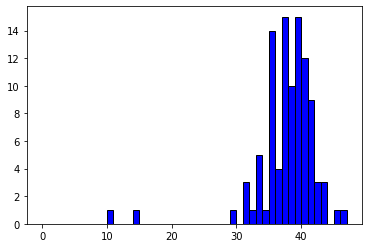

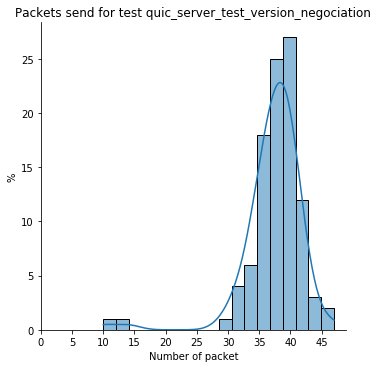

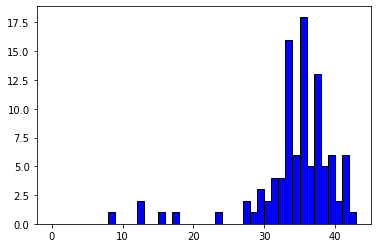

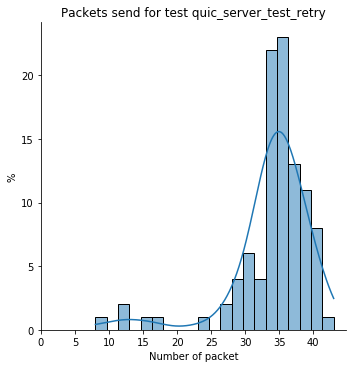

In [11]:
# Failure per test

train_df.TestName.unique()
tests = train_df.TestName.unique()

#plt.figure(figsize=[10,10])
#f,a = plt.subplots(2,2)
#a = a.ravel()

for t in tests:
    subdf = train_df.loc[train_df['TestName'] == t]
    #subdf = subdf.loc[subdf['Implementation'] != "quinn"]
    max_value = subdf["NbPktSend"].max() 
    
    plt.hist(subdf['NbPktSend'], color = 'blue', edgecolor = 'black',
             range = [0,max_value],bins=max(int(max_value),1))

    # seaborn histogram
    sns.displot(subdf['NbPktSend'],
                 kde=True)
    # Add labels
    plt.xticks(np.arange(0, int(max_value),5))
    # positions = (0, 1)
    # labels = ("Fail", "Pass")
    # plt.xticks(positions, labels)
    plt.title("Packets send for test " + t)
    plt.xlabel('Number of packet')
    plt.ylabel('%')
    filename = 'plot/' + "packets_" + t + '.png'
    #plt.savefig(filename)
    plt.show()

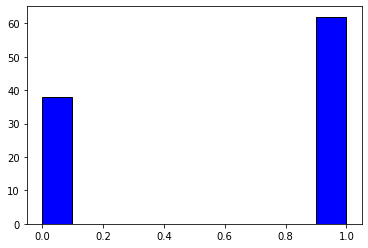

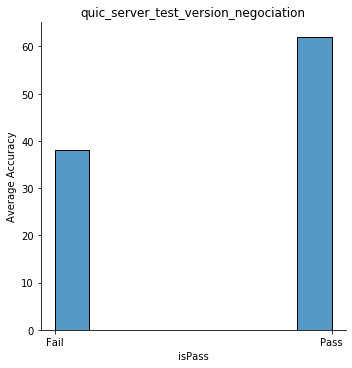

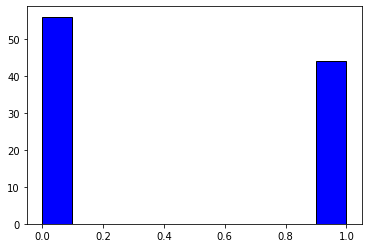

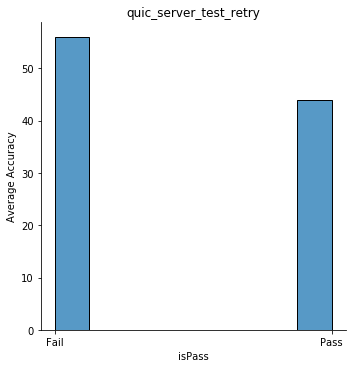

In [12]:
for t in tests:
    subdf = train_df.loc[train_df['TestName'] == t]
    plt.hist(subdf['isPass'], color = 'blue', edgecolor = 'black')

    # seaborn histogram
    sns.displot(subdf['isPass'], kde=False)
    # Add labels
    plt.title(t)
    plt.xticks(np.arange(0, 2, 1))
    positions = (0, 1)
    labels = ("Fail", "Pass")
    plt.xticks(positions, labels)
    plt.xlabel('isPass')
    plt.ylabel('Average Accuracy')
    plt.show()

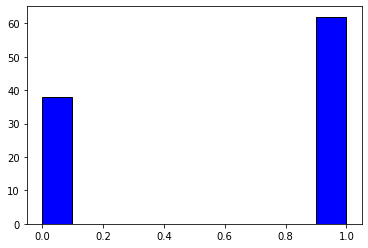

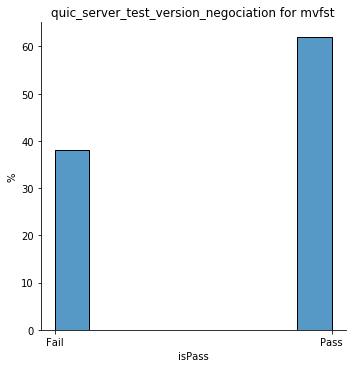

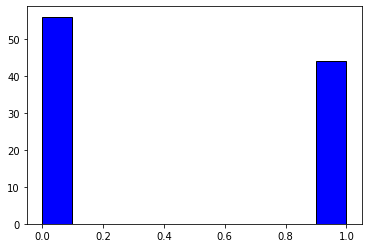

In [14]:
tests = train_df.TestName.unique()

servers = train_df.Implementation.unique()
#plt.figure(figsize=[10,10]) 'lsquic',
#f,a = plt.subplots(2,2)
#a = a.ravel()

for t in tests:
    subdf = train_df.loc[train_df['TestName'] == t]
    for s in servers:
        subsubdf = subdf.loc[subdf['Implementation'] == s]
        plt.hist(subsubdf['isPass'], color = 'blue', edgecolor = 'black')

        # seaborn histogram
        sns.displot(subsubdf['isPass'], kde=False)
        # Add labels
        plt.xticks(np.arange(0, 1, 1))
        positions = (0, 1)
        labels = ("Fail", "Pass")
        plt.xticks(positions, labels)
        plt.title(t + " for " + s)
        plt.xlabel('isPass')
        plt.ylabel('%')
        filename = 'plot/' + t + "_for_" + s + '.png'
        #plt.savefig(filename)

        plt.show()
    

In [15]:
for t in servers:
    subdf = train_df.loc[train_df['Implementation'] == t]
    
    print(t)
    print(len(subdf.index))
    print(subdf["isPass"].sum())
    print()

mvfst
200
106.0



In [16]:
for t in servers:
    subdf = train_df.loc[train_df['Implementation'] == t]
    for s in tests:
        ssubdf = subdf.loc[subdf['TestName'] == s]
        print(t)
        print(s)
        print(len(ssubdf.index))
        print(ssubdf["isPass"].sum())
        print()

mvfst
quic_server_test_version_negociation
100
62.0

mvfst
quic_server_test_retry
100
44.0



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 


quic_server_test_version_negociation
mvfst
['No Error', 'Handshake not completed', 'require ~_generating & ~queued_non_ack(scid) -> ack_credit(scid) > 0  # [5]+']


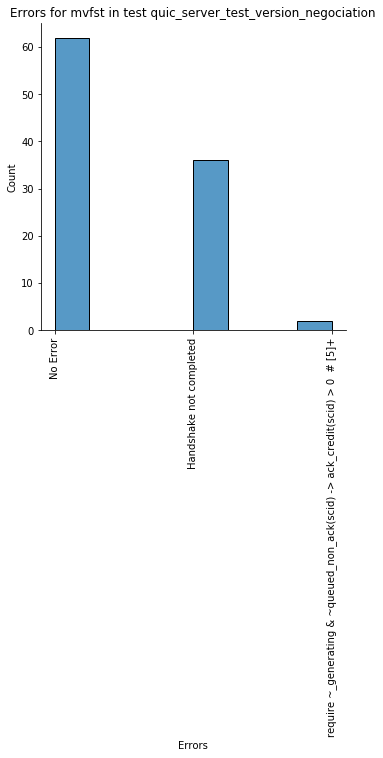

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 


quic_server_test_retry
mvfst
['No Error', 'Handshake not completed', 'require ~_generating & ~queued_non_ack(scid) -> ack_credit(scid) > 0  # [5]+', '}']


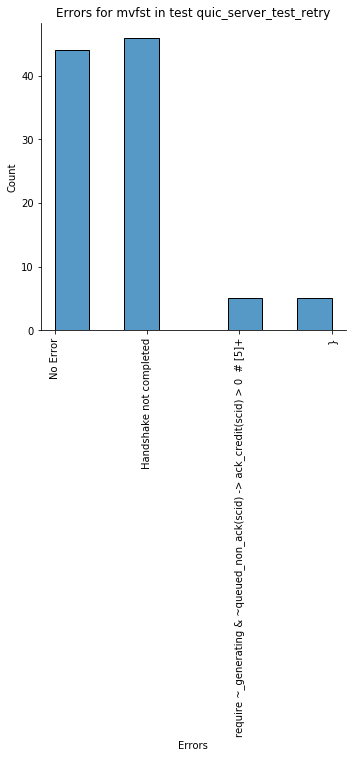

In [17]:
all_errors = train_df["ErrorIEV"].unique().tolist()
res = []
for i, row in train_df.iterrows():
    ind = all_errors.index(row["ErrorIEV"])
    res.append(ind)
train_df["ErrorsCode"] = res


for s in servers:
    subdf = train_df.loc[train_df['Implementation'] == s]
    for t in tests:
        subsubdf = subdf.loc[subdf['TestName'] == t]
        errors = subsubdf["ErrorIEV"].unique()
        
        all_errors = subsubdf["ErrorIEV"].unique().tolist()
        res = []
        for i, row in subsubdf.iterrows():
            ind = all_errors.index(row["ErrorIEV"])
            res.append(ind)
        subsubdf["ErrorsCode"] = res
        
        print(t)
        print(s)
        print(all_errors)
        
                
        # seaborn histogram
        sns.displot(x=subsubdf['ErrorsCode'],  kde=False ) #,hue="Implementation"
        # Add labels
        plt.title("Errors for " + s + " in test " + t)
        plt.xticks(np.arange(0,len(all_errors)), rotation=90)  #'vertical'
        positions = tuple(np.arange(0, len(all_errors)))
        labels =  tuple(errors.tolist())
        plt.xticks(positions, labels)
        plt.xlabel('Errors')
        plt.ylabel('Count')
        filename = 'plot/' + "errors_for_" + s + "_in_test_" + t + '.png'
        fig = plt.gcf()
        plt.tight_layout()
        #fig.set_size_inches(20,20)
        #plt.savefig(filename, dpi=fig.dpi*2)
        plt.show()

In [19]:
subdf = train_df.loc[train_df['TestName'] == 'quic_server_test_version_negociation']
subsubdf = subdf.loc[subdf['Implementation'] == 'mvfst']
print(subsubdf.loc[subsubdf["ErrorIEV"] == 'Handshake not completed']["OutputFile"])
#print(subsubdf.loc[subsubdf['TestName'] == 'quic_server_test_stream']["OutputFile"][67][-50:])

6      /home/user/Documents/QUIC-FormalVerification/r...
9      /home/user/Documents/QUIC-FormalVerification/r...
10     /home/user/Documents/QUIC-FormalVerification/r...
26     /home/user/Documents/QUIC-FormalVerification/r...
30     /home/user/Documents/QUIC-FormalVerification/r...
33     /home/user/Documents/QUIC-FormalVerification/r...
37     /home/user/Documents/QUIC-FormalVerification/r...
39     /home/user/Documents/QUIC-FormalVerification/r...
40     /home/user/Documents/QUIC-FormalVerification/r...
41     /home/user/Documents/QUIC-FormalVerification/r...
47     /home/user/Documents/QUIC-FormalVerification/r...
53     /home/user/Documents/QUIC-FormalVerification/r...
57     /home/user/Documents/QUIC-FormalVerification/r...
65     /home/user/Documents/QUIC-FormalVerification/r...
70     /home/user/Documents/QUIC-FormalVerification/r...
73     /home/user/Documents/QUIC-FormalVerification/r...
78     /home/user/Documents/QUIC-FormalVerification/r...
79     /home/user/Documents/QUI

In [20]:
subdf = train_df.loc[train_df['TestName'] == 'quic_server_test_version_negociation']
subsubdf = subdf.loc[subdf['Implementation'] == 'mvfst']
print(subsubdf.loc[subsubdf["ErrorIEV"] == 'Handshake not completed']["OutputFile"][199][-50:])
#print(subsubdf.loc[subsubdf['TestName'] == 'quic_server_test_stream']["OutputFile"][67][-50:]) 199

rver/139/quic_server_test_version_negociation0.iev
